# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

<b>'The most difficult thing in life is to know yourself'</b>

This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So I tried to learn how to swim before jumping into the water. Based on [Hair et al. (2013)](https://amzn.to/2JuDmvo), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [117]:
#bring in the six packs
df_train = pd.read_csv('new model2.csv')


In [36]:
#check the decoration
df_train.columns

Index(['Company', 'EV', 'TTTMRev', 'TTMRev', 'NTMRev', 'EV/TTM', 'EV/NTM',
       'TTMRevGr', 'NTMRevGr', 'GP', 'GP%', 'EBITDA', 'EBITDA%', 'Cash', 'NI',
       'NI%'],
      dtype='object')

# 2. First things first: analysing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

*Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:*

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*

In [37]:
#descriptive statistics summary
df_train['EV/TTM'].describe()

count    192.000000
mean       6.757747
std        4.997212
min        0.580660
25%        3.216562
50%        5.489194
75%        8.955374
max       32.785672
Name: EV/TTM, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

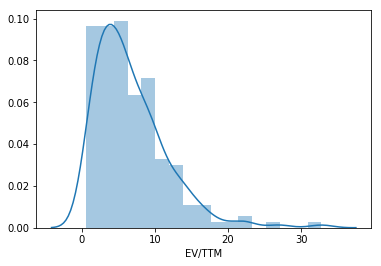

In [38]:
#histogram
sns.distplot(df_train['EV/TTM']);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [31]:
#skewness and kurtosis
print("Skewness: %f" % df_train['EV/TTM'].skew())
print("Kurtosis: %f" % df_train['EV/TTM'].kurt())

Skewness: 1.673965
Kurtosis: 4.439180


*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

# 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!*

*To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

In [39]:
df_train['NTMRevGr'].describe()

count    192.000000
mean       0.186481
std        0.239803
min       -0.393865
25%        0.063446
50%        0.125029
75%        0.251691
max        1.499219
Name: NTMRevGr, dtype: float64

In [40]:
df_train['TTMRevGr'].astype('float64')

0      0.210698
1      0.075283
2      0.464187
3      0.772531
4      0.142100
5      0.193712
6      0.270558
7      0.628764
8      0.105622
9     -0.105187
10     1.099294
11     0.160913
12     0.538125
13    -0.054213
14     0.030559
15     0.284026
16     0.089373
17     1.072875
18     0.027178
19     0.315013
20     1.166730
21     0.278916
22     0.062958
23     0.247711
24     0.494615
25     0.139757
26     0.186044
27     0.467728
28     0.340833
29     0.134321
         ...   
162    1.192415
163    1.945274
164    1.367557
165    0.776364
166    0.113284
167    0.770002
168    2.773790
169    1.404633
170    0.280710
171    0.571196
172    0.872397
173    0.315820
174   -0.051680
175    1.148918
176    0.246842
177    2.286314
178    0.989287
179    4.282542
180    0.454429
181    0.804586
182    0.660157
183    0.345484
184    0.294436
185    0.100546
186    0.191163
187    0.091529
188    0.188014
189   -0.817993
190    1.163607
191    0.474162
Name: TTMRevGr, Length: 

### Relationship with numerical variables

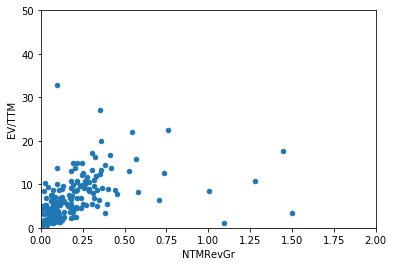

In [41]:
#scatter plot grlivarea/saleprice
var = 'NTMRevGr'
data = pd.concat([df_train['EV/TTM'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='EV/TTM', ylim=(0,50), xlim=(0,2));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a <b>linear relationship.</b>*

*And what about 'TotalBsmtSF'?*

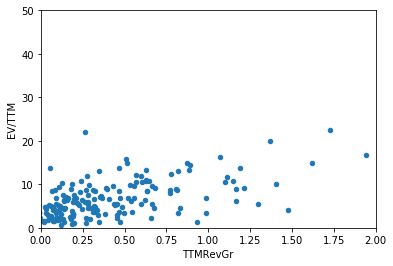

In [42]:
#scatter plot totalbsmtsf/saleprice
var = 'TTMRevGr'
data = pd.concat([df_train['EV/TTM'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='EV/TTM', ylim=(0,50), xlim=(0,2));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a <b>strong linear (exponential?)</b> reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

#### Correlation matrix (heatmap style)

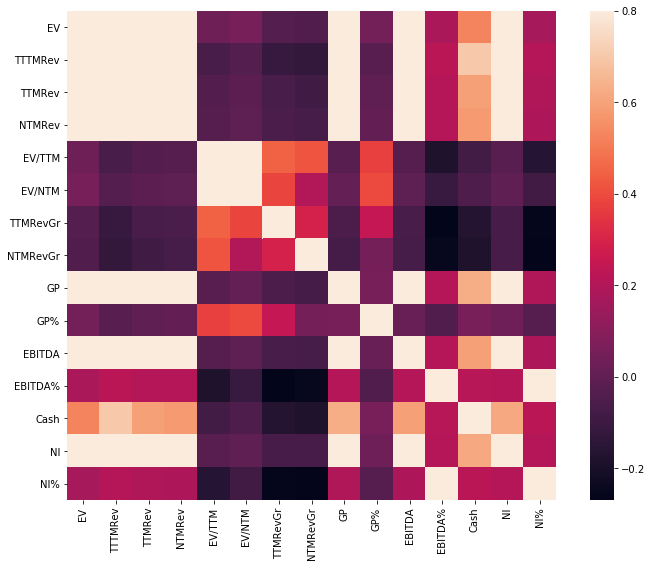

In [44]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

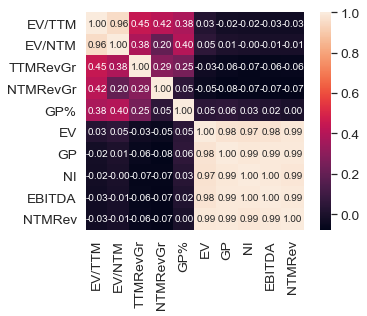

In [45]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'EV/TTM')['EV/TTM'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

In [48]:
df_train.columns

Index(['Company', 'EV', 'TTTMRev', 'TTMRev', 'NTMRev', 'EV/TTM', 'EV/NTM',
       'TTMRevGr', 'NTMRevGr', 'GP', 'GP%', 'EBITDA', 'EBITDA%', 'Cash', 'NI',
       'NI%'],
      dtype='object')

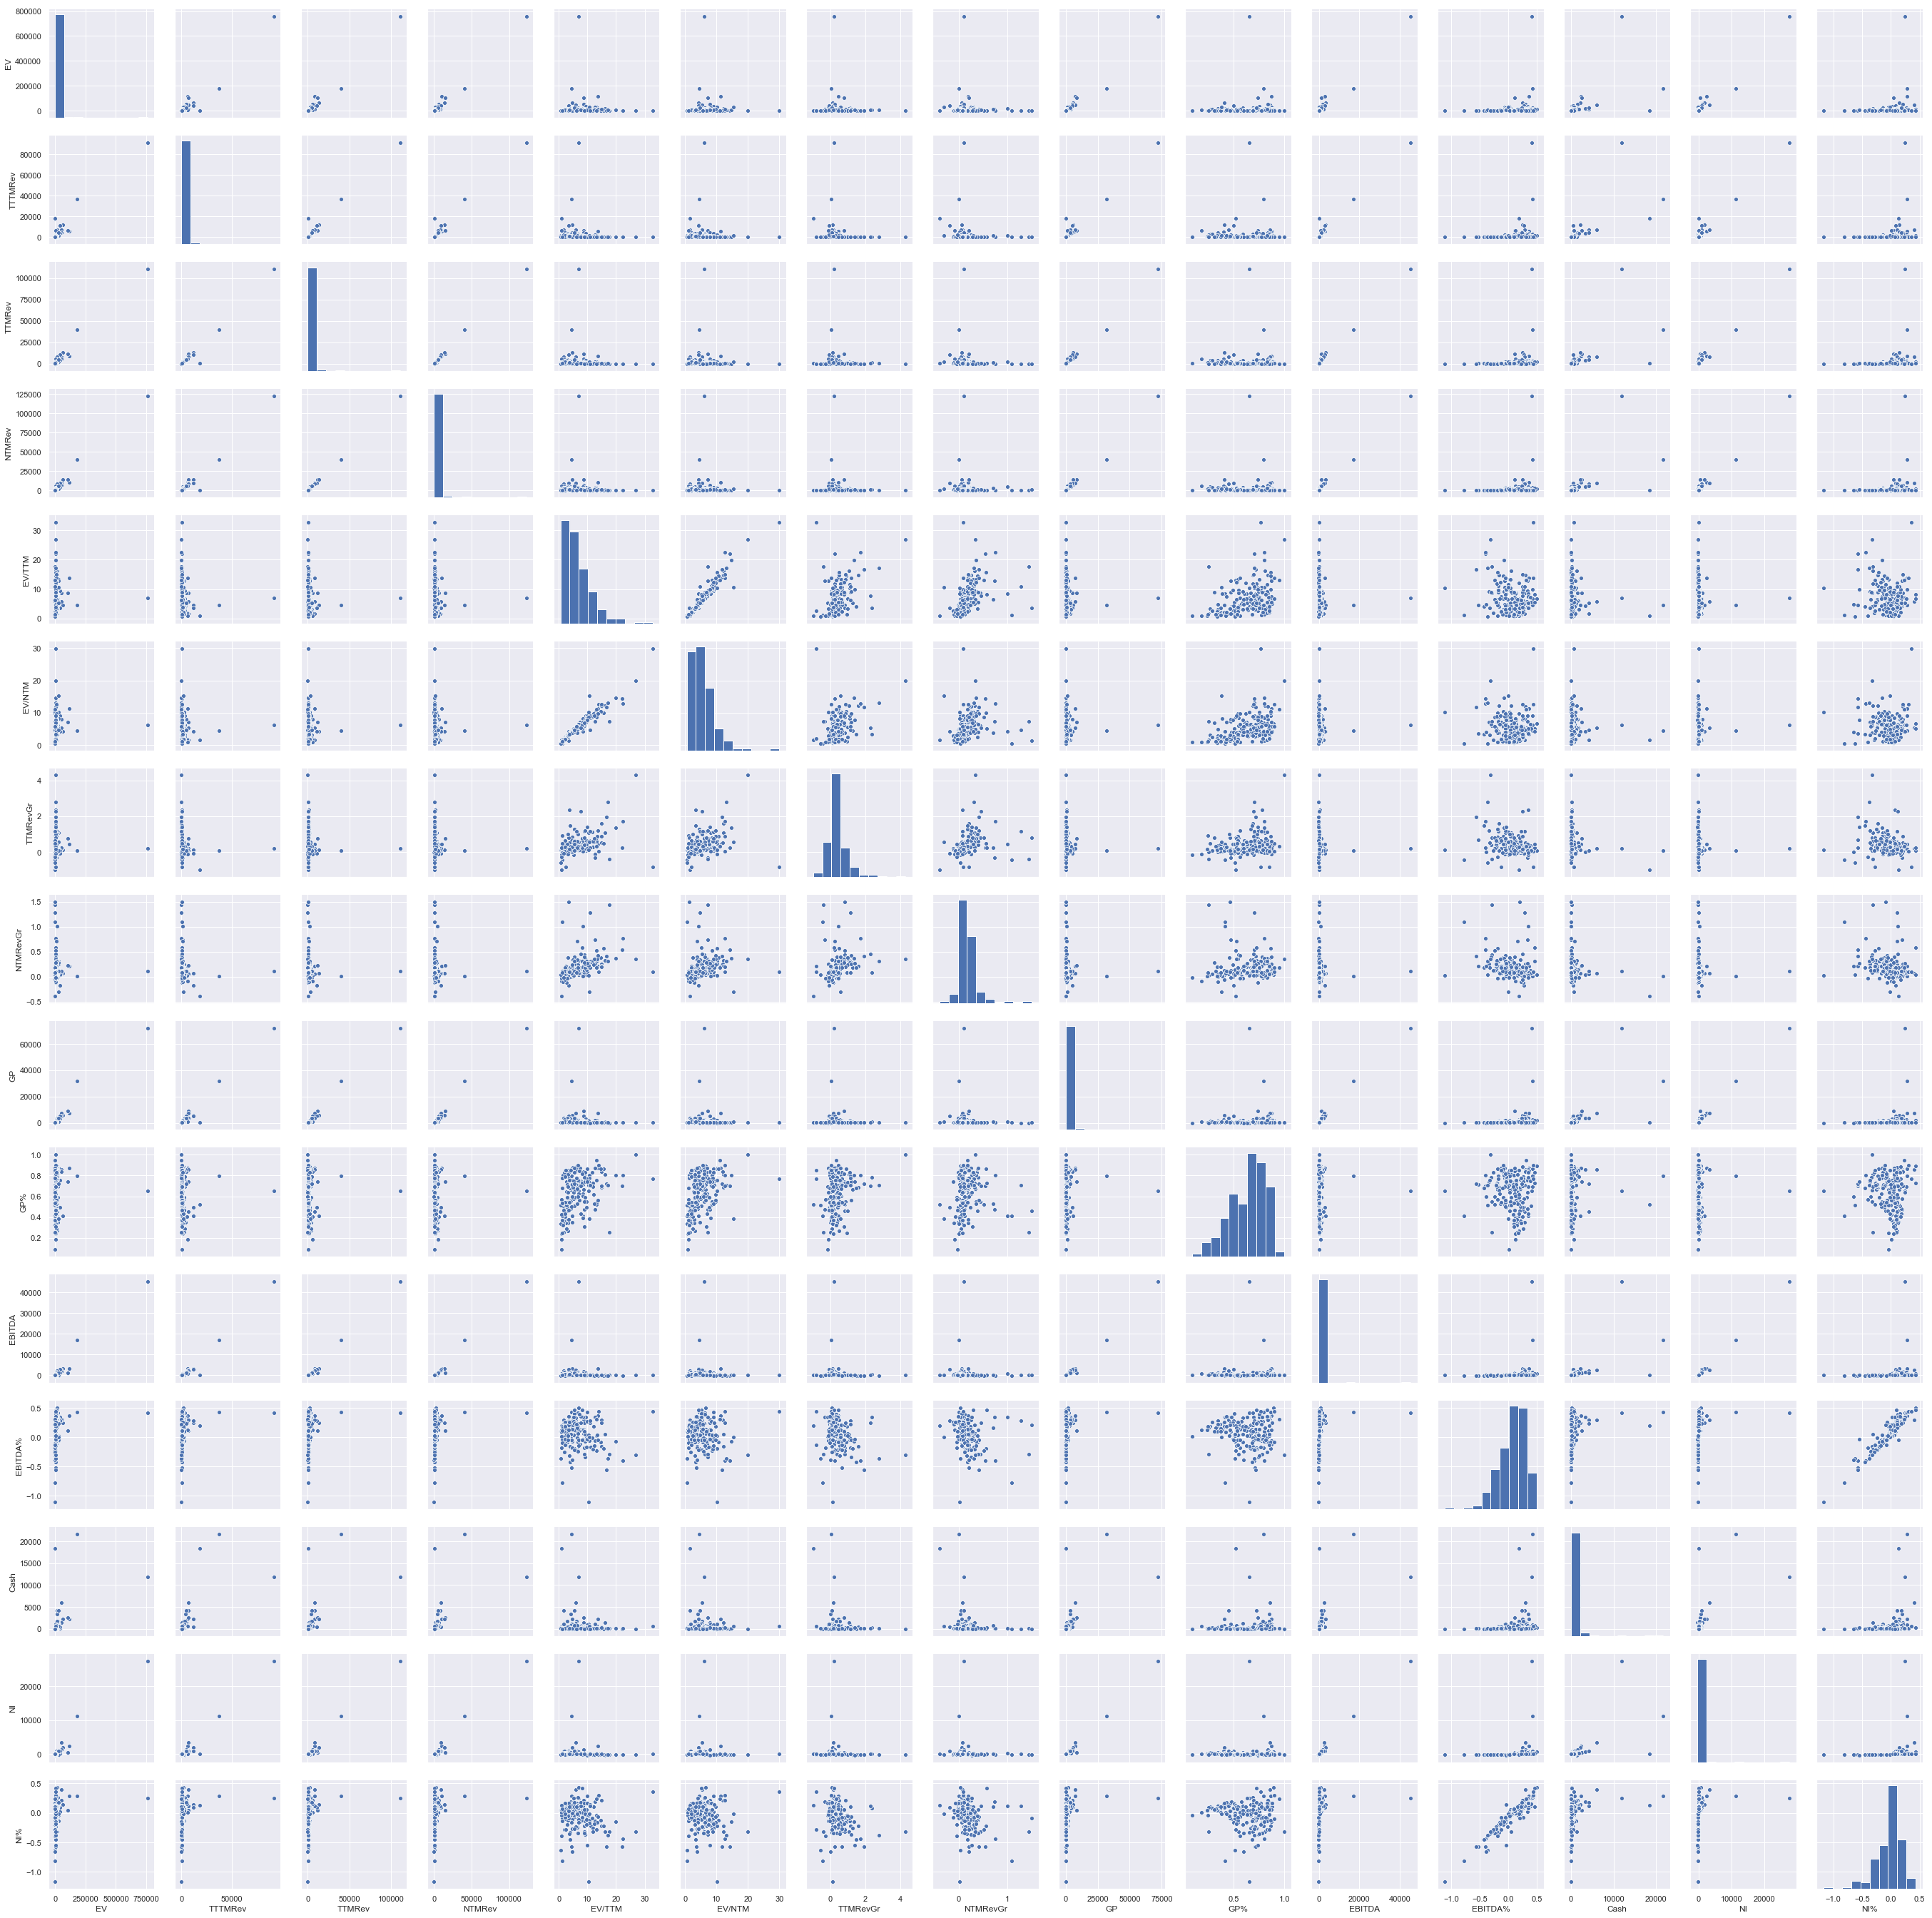

In [49]:
#scatterplot
sns.set()
cols = ['Company', 'EV', 'TTTMRev', 'TTMRev', 'NTMRev', 'EV/TTM', 'EV/NTM',
       'TTMRevGr', 'NTMRevGr', 'GP', 'GP%', 'EBITDA', 'EBITDA%', 'Cash', 'NI',
       'NI%']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

# Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [50]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['EV/TTM'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.2393384 ]
 [-1.20439376]
 [-1.17461634]
 [-1.1721788 ]
 [-1.17166889]
 [-1.17137211]
 [-1.16098478]
 [-1.15480392]
 [-1.11715071]
 [-1.11365095]]

outer range (high) of the distribution:
[[1.8096967 ]
 [1.90338962]
 [2.00504789]
 [2.10403837]
 [2.20512367]
 [2.65265558]
 [3.08552886]
 [3.1519885 ]
 [4.06001784]
 [5.22210575]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

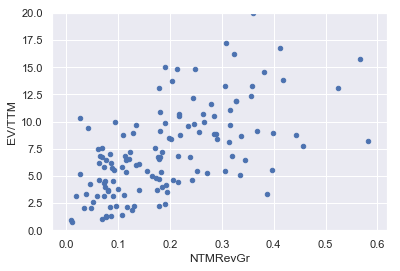

In [119]:
#bivariate analysis saleprice/grlivarea
var = 'NTMRevGr'
data = pd.concat([df_train['EV/TTM'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='EV/TTM', ylim=(0,20));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [116]:
#deleting points
df_train.sort_values(by = 'NTMRevGr', ascending = False)[:5]

,Company,EV,TTTMRev,TTMRev,NTMRev,EV/TTM,EV/NTM,TTMRevGr,NTMRevGr,GP,GP%,EBITDA,EBITDA%,Cash,NI,NI%
5,SMAR US Equity,2499.6136,40.751,111.253,195.833,22.467831,12.764006,1.730068,0.760249,89.57100,0.805111,-44.902,-0.403603,58.158,-49.10600,-0.441390
103,TTWO US Equity,11310.2488,1413.698,1762.658,3002.867,6.416587,3.766483,0.246842,0.703602,927.55099,0.526223,287.156,0.162911,808.973,192.85893,0.109414
105,GSKY US Equity,2665.1181,263.865,325.887,515.725,8.178044,5.167712,0.235052,0.582527,236.17900,0.724727,150.269,0.461108,224.614,138.66800,0.425509
57,TENB US Equity,2961.8824,124.371,187.727,294.177,15.777605,10.068368,0.509411,0.567047,162.13900,0.863696,-36.068,-0.192130,27.210,-41.02200,-0.218519
100,PS US Equity,3692.9135,131.841,166.824,257.700,22.136584,14.330281,0.265342,0.544742,116.99600,0.701314,-66.083,-0.396124,28.267,-95.29388,-0.571224


In [118]:
df_train.drop(df_train.index[[27,15,62,48,113,130,66,80,5,103]], inplace=True)

In [120]:
df_train.describe()

,EV,TTTMRev,TTMRev,NTMRev,EV/TTM,EV/NTM,TTMRevGr,NTMRevGr,GP,GP%,EBITDA,EBITDA%,Cash,NI,NI%
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,13393.930021,1525.498069,1966.901696,2225.502104,7.449701,6.060514,0.562838,0.195849,1286.084882,0.668457,544.893372,0.042948,439.253922,301.071025,-0.045322
std,66838.015231,7953.720522,9642.834356,10739.963134,4.518169,3.286355,0.566134,0.126206,6306.812128,0.161522,3935.043341,0.234788,1246.344409,2407.907396,0.218986
min,200.296800,9.644000,24.586000,25.217000,0.754830,0.746269,0.100546,0.008653,15.934000,0.241577,-257.308000,-1.114374,9.086000,-334.860654,-1.169771
25%,1455.078225,154.316250,216.174500,265.762250,4.319268,3.748036,0.211359,0.088466,151.226501,0.571078,-26.223500,-0.075556,57.007000,-48.671250,-0.156473
50%,2744.149150,285.488500,474.369500,552.700000,6.721807,5.701912,0.392529,0.179716,274.865999,0.702484,22.900500,0.076930,125.558000,-1.394938,-0.005396
75%,6351.826450,787.767250,1124.327500,1254.070000,9.676390,7.909138,0.663942,0.282711,688.415240,0.775734,163.068858,0.206248,316.631000,79.537607,0.101619
max,759109.379900,91154.000000,110360.000000,122897.462000,26.993614,19.984089,4.282542,0.582527,72007.000000,0.999659,45319.000000,0.464751,11946.000000,27500.140000,0.425509


# 5. Getting hard core

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

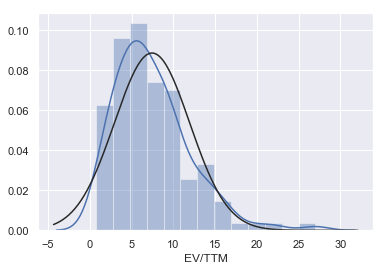

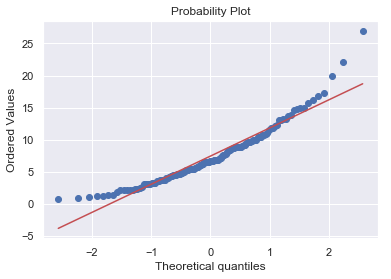

In [121]:
#histogram and normal probability plot
sns.distplot(df_train['EV/TTM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['EV/TTM'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

In [122]:
#applying log transformation
df_train['EV/TTM'] = np.log(df_train['EV/TTM'])

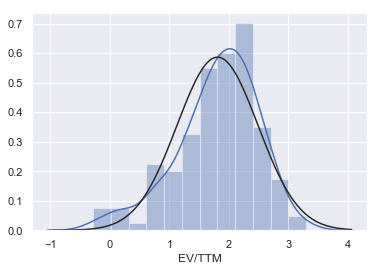

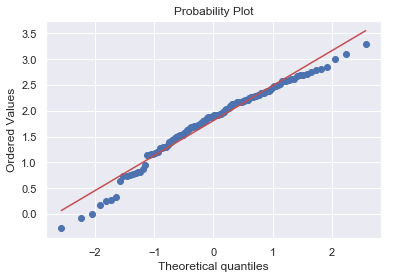

In [123]:
#transformed histogram and normal probability plot
sns.distplot(df_train['EV/TTM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['EV/TTM'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

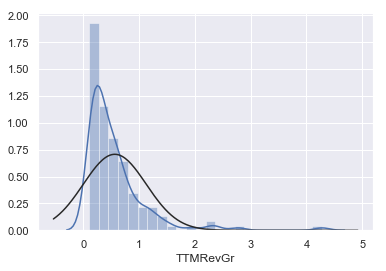

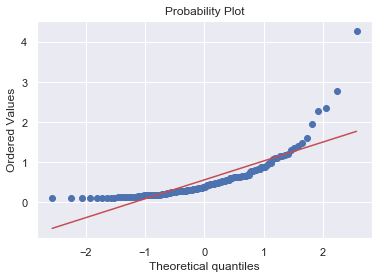

In [124]:
#histogram and normal probability plot
sns.distplot(df_train['TTMRevGr'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TTMRevGr'], plot=plt)

Tastes like skewness... *Avada kedavra!*

In [125]:
#data transformation
df_train['TTMRevGr'] = np.log(df_train['TTMRevGr'])

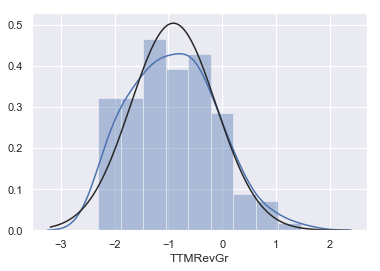

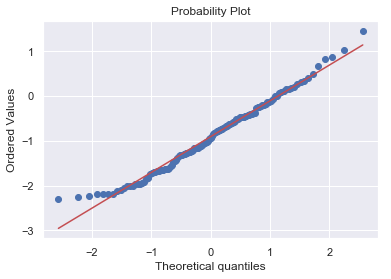

In [126]:
#transformed histogram and normal probability plot
sns.distplot(df_train['TTMRevGr'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TTMRevGr'], plot=plt)

Next, please...

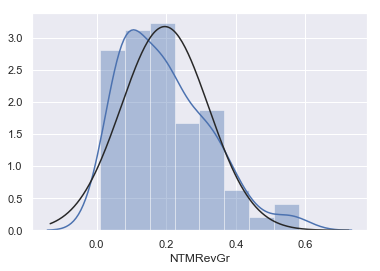

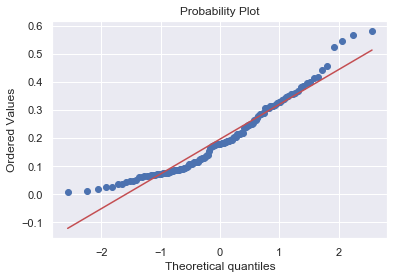

In [127]:
#histogram and normal probability plot
sns.distplot(df_train['NTMRevGr'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NTMRevGr'], plot=plt)

In [128]:
#data transformation
df_train['NTMRevGr'] = np.log(df_train['NTMRevGr'])

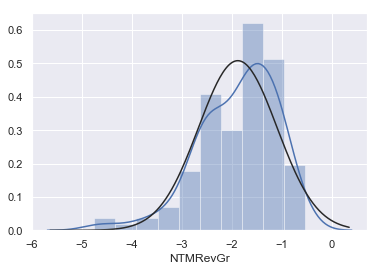

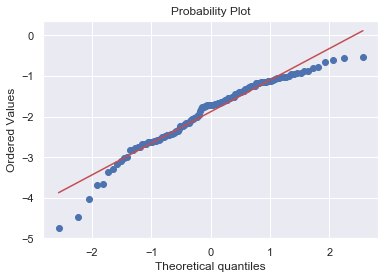

In [129]:
#transformed histogram and normal probability plot
sns.distplot(df_train['NTMRevGr'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NTMRevGr'], plot=plt)

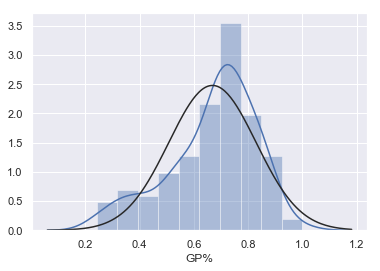

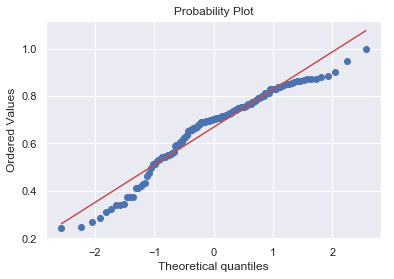

In [137]:
#histogram and normal probability plot
sns.distplot(df_train['GP%'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GP%'], plot=plt)

In [139]:
#data transformation
df_train['GP%'] = np.log(df_train['GP%'])

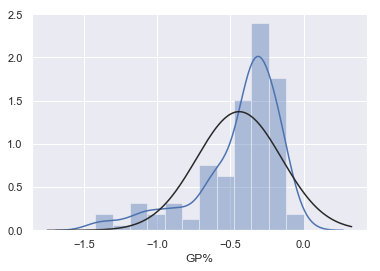

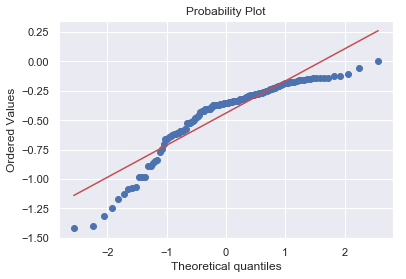

In [140]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GP%'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GP%'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

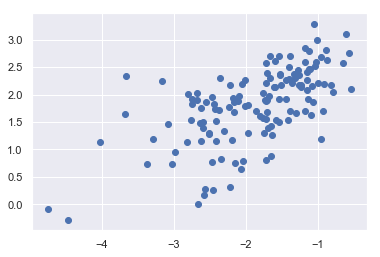

In [133]:
#scatter plot
plt.scatter(df_train['NTMRevGr'], df_train['EV/TTM']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

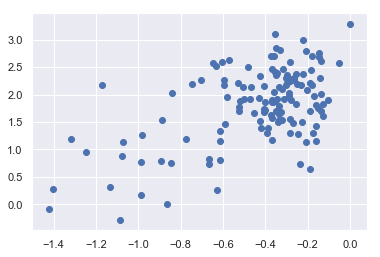

In [141]:
#scatter plot
plt.scatter(df_train['GP%'], df_train['EV/TTM']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Last but not the least, dummy variables

Easy mode.

In [143]:
df_train.to_csv('new_model3.csv')

# Conclusion

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

But the quest is not over. Remember that our story stopped in the Facebook research. Now it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

It's up to you to find out.

# <b>References</b>
* [My blog](http://pmarcelino.com)
* [My other kernels](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://amzn.to/2JuDmvo)

# Acknowledgements

Thanks to [João Rico](https://www.linkedin.com/in/joaomiguelrico/) for reading drafts of this.